## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *H1* i *H2*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [2]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/'

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)


jet = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)

In [34]:
def draw_histogram(img, title):
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(10, 5)

    axs[0].imshow(img, 'gray', vmin=0, vmax=256)
    axs[0].axis('off')
    axs[0].set_title(title)

    hist = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist_accumulated = np.cumsum(hist)

    axs[1].plot(hist / np.max(hist))
    axs[1].plot(hist_accumulated / np.max(hist_accumulated))
    axs[1].grid()


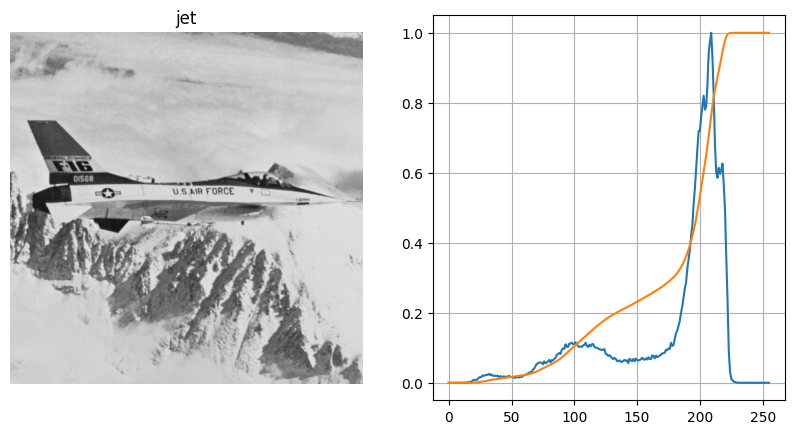

In [35]:
draw_histogram(jet, 'jet')

In [36]:
def equalize_histogram(img, lm):
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    h1 = hist[:lm + 1]
    h2 = hist[lm + 1:]

    c1 = np.cumsum(h1)
    c2 = np.cumsum(h2)

    c1 = c1 / c1[-1] if c1[-1] != 0 else c1
    c2 = c2 / c2[-1] if c2[-1] != 0 else c2

    c1_transformed = c1 * lm
    c2_transformed = (c2 * (255 - lm - 1)) + (lm + 1)

    lut = np.concatenate((c1_transformed, c2_transformed), axis=0).astype(np.uint8)

    equalized_img = cv2.LUT(img, lut)

    return equalized_img



### BBHE

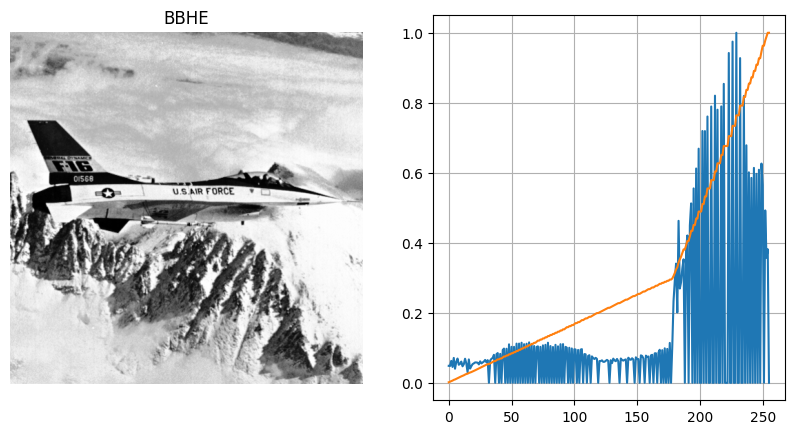

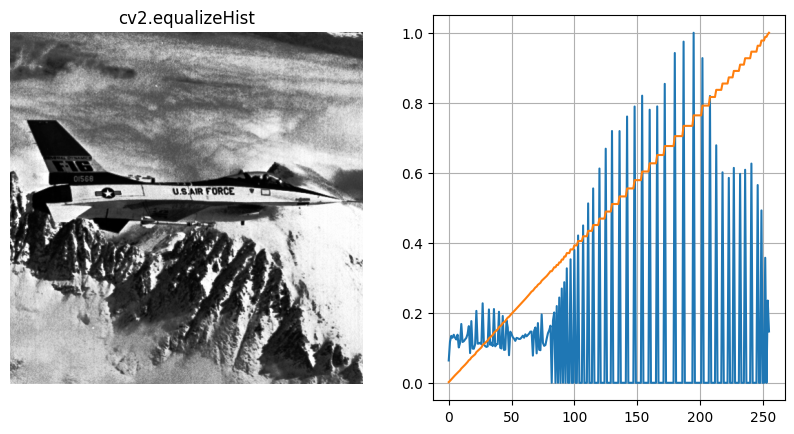

In [37]:
lm = np.mean(jet)

jet_equalized = equalize_histogram(jet, int(lm))
draw_histogram(jet_equalized, "BBHE")
draw_histogram(cv2.equalizeHist(jet), "cv2.equalizeHist")


### DSIHE

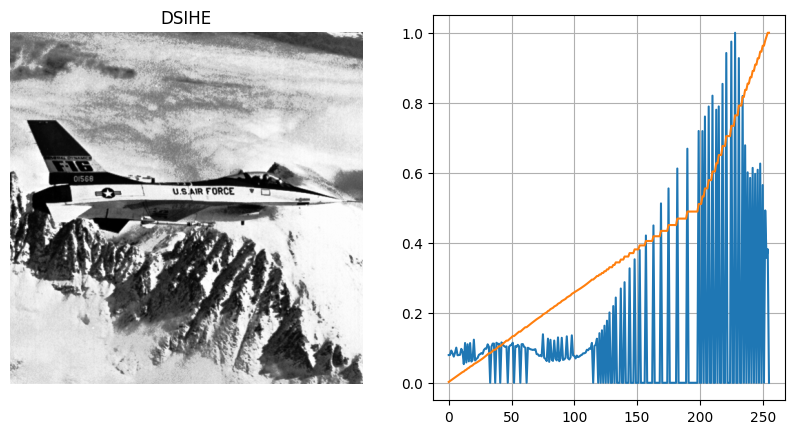

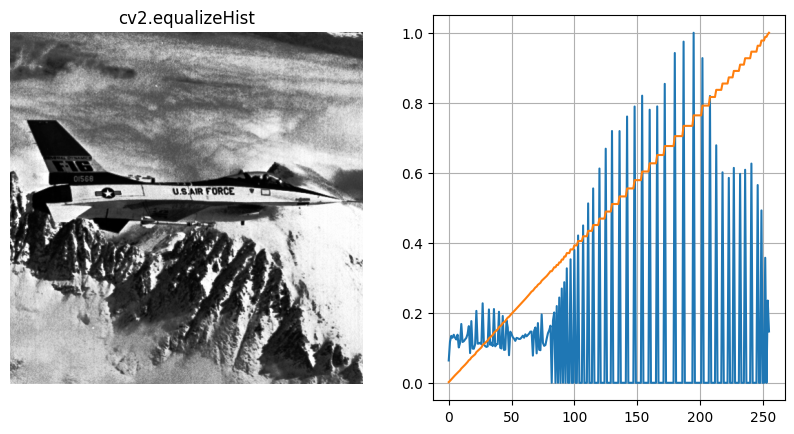

In [38]:
lm = int(np.median(jet))
jet_equalized = equalize_histogram(jet, lm)
draw_histogram(jet_equalized, "DSIHE")
draw_histogram(cv2.equalizeHist(jet), "cv2.equalizeHist")